# The purpose of this code is to predict the price of AirBNB Apartments using a Multiple Regression Model.

In [ ]:
import pandas as pd

In [2]:
### Step 1: Read the datasets

df = pd.read_csv("AirBNB.csv")
print(df)

             id        room_type  accommodates  bathrooms cancellation_policy  \
0       6901257  Entire home/apt           3.0        1.0              strict   
1       6304928  Entire home/apt           7.0        1.0              strict   
2       7919400  Entire home/apt           5.0        1.0            moderate   
3      13418779  Entire home/apt           4.0        1.0            flexible   
4       3808709  Entire home/apt           2.0        1.0            moderate   
...         ...              ...           ...        ...                 ...   
74106  14549287     Private room           1.0        1.0            flexible   
74107  13281809  Entire home/apt           4.0        2.0            moderate   
74108  18688039  Entire home/apt           5.0        1.0            moderate   
74109  17045948  Entire home/apt           2.0        1.0              strict   
74110   3534845  Entire home/apt           4.0        1.0            moderate   

      cleaning_fee instant_

C:\Users\claud\AppData\Local\Temp\ipykernel_60228\1237136825.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


In [3]:
### Step 2: Exploratory Data Analysis

# 2.1. Identify the size of the datasets(Rows & Columns) and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [6]:
# 2.2. Check if there are Duplicates in this datasets
# Checking from the ID Column will be more relevant as the ID is the unique column

if df['id'].duplicated().any():
    print("Duplicates exist in the ID Column")
else:
    print("Duplicates do NOT exist in the ID Column")


Duplicates do NOT exist in the ID Column


In [4]:
# 2.3. Check missing values
print(df.isnull().sum())

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64


In [11]:
# 2.3. Filling the missing values with Means for Numerical variables

df.fillna(df.mean(numeric_only= True), inplace = True)

# Recheck if the missing values are now removed
print(df.isnull().sum())

id                      0
room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
cleaning_fee            4
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64


In [61]:
# 2.3.1. In case I want to convert cleaning_fee and instant_bookable columns into binary columns

df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: 1 if str(x).lower() in ['true', 't', 'yes', '1'] else 0)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if str(x).lower() in ['true', 't', 'yes', '1'] else 0)

In [12]:
# 2.4. Distribution and Outliers of Numerical Variables

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Determine a function to plot the Histogram for Variable Distribution

def histogram_boxplot(data, feature, figsize=(8, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# Determine the function to plot a Boxplot for Variable Outliers

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

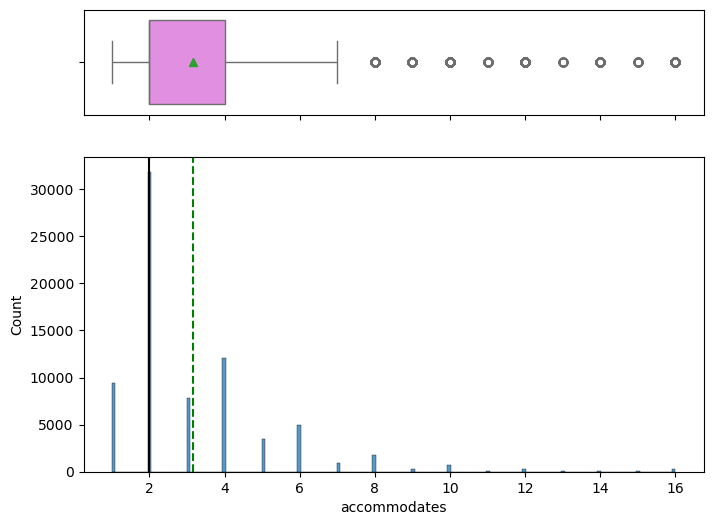

In [18]:
histogram_boxplot(df,'accommodates')

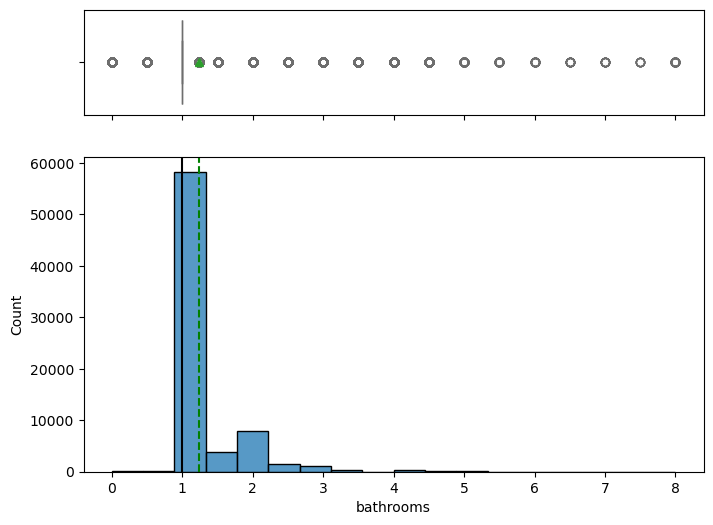

In [19]:
histogram_boxplot(df,'bathrooms')

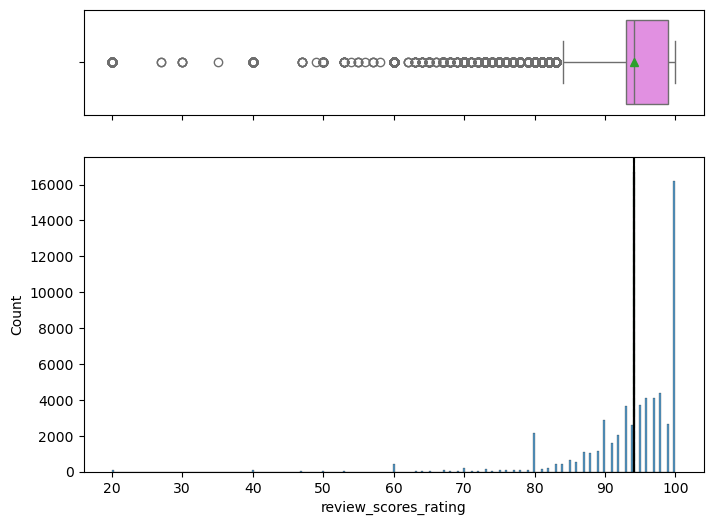

In [20]:
histogram_boxplot(df,'review_scores_rating')

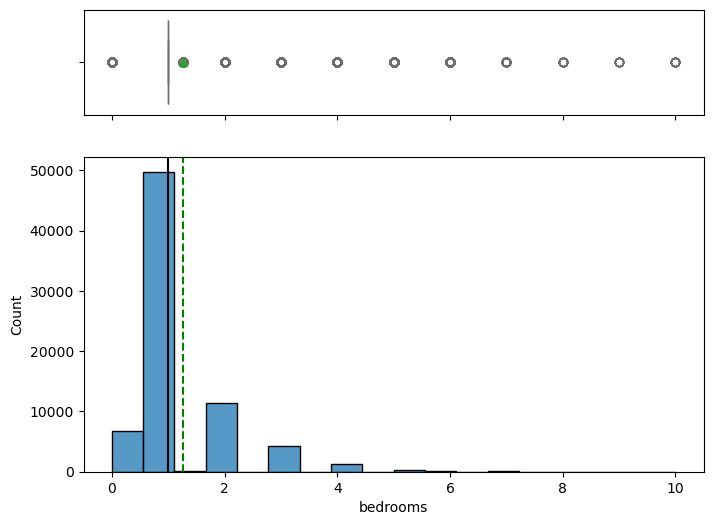

In [21]:
histogram_boxplot(df,'bedrooms')

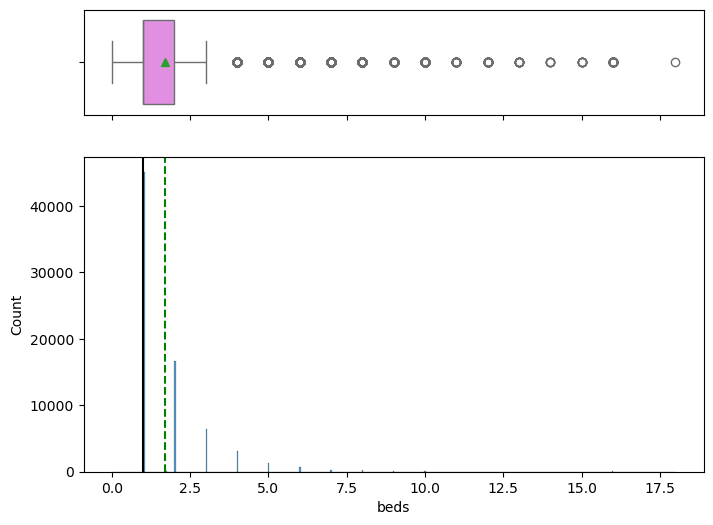

In [22]:
histogram_boxplot(df,'beds')

In [ ]:
# 2.5. Determine the Correlation Matrix

# The correlation Matrix is run ONLY for Numerical Variables
# Start by selecting Numerical Variables

numeric_df = df.select_dtypes(include='number')

print(numeric_df)

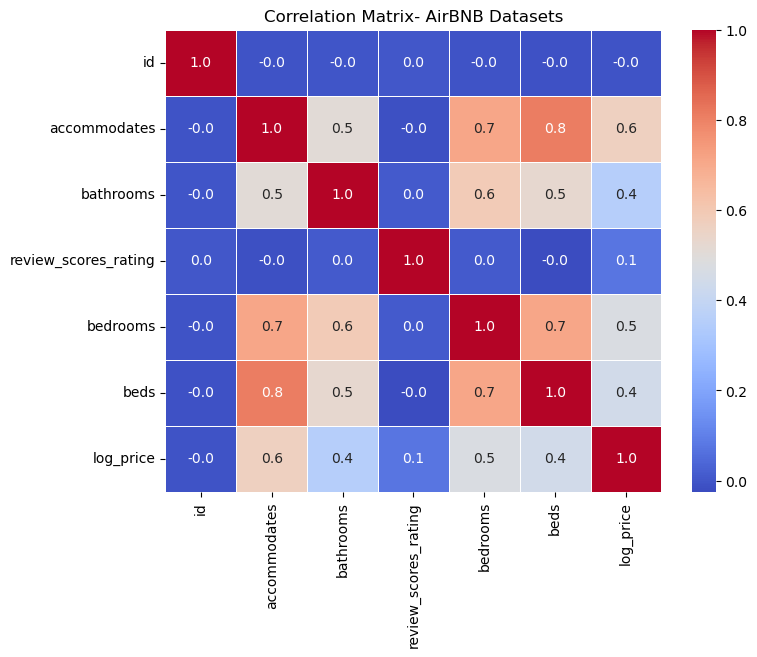

In [29]:
import numpy as np

corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt= ".1f", linewidths=0.5)
plt.title("Correlation Matrix- AirBNB Datasets")
plt.show()

In [34]:
# 2.6. Produce the Statistical Summary Table

numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.0,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
accommodates,74111.0,3.155125e+00,2.153559e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,74111.0,1.235272e+00,5.812563e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
review_scores_rating,74111.0,9.406736e+01,6.896002e+00,20.0,9.300000e+01,9.406736e+01,9.900000e+01,1.000000e+02
bedrooms,74111.0,1.265797e+00,8.516196e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,74111.0,1.710868e+00,1.253033e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
log_price,74111.0,4.782069e+00,7.173938e-01,0.0,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


In [32]:
### Step 3: Data Processing

# 3.1. Data Partitioning

from sklearn.model_selection import train_test_split

x = df.drop(columns=['id','room_type','cancellation_policy','cleaning_fee','instant_bookable'])
y = df['log_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=42)
print(f"Training Sample:{x_train.shape[0]}, Test Sample:{x_test.shape[0]}")

Training Sample:44466, Test Sample:29645


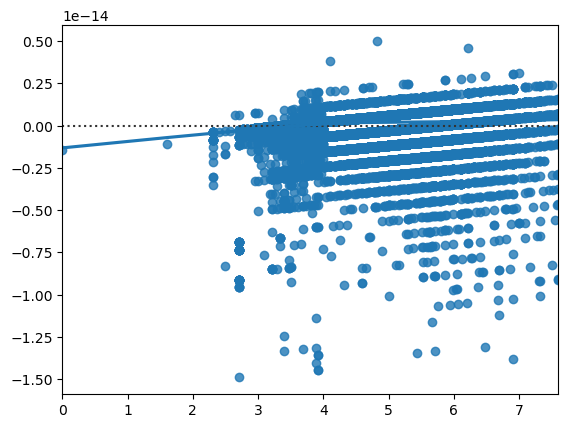

In [49]:
### Step 4: Check the required Assumptions for a Linear Regression Model


import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 4.1. Assuming 'data' is your DataFrame and 'X' and 'Y' are your independent and dependent variables
# x = df['Independent variables']  # Example independent variables
# y = df['dependent_variable']

# Add constant to the independent variables for intercept
x = add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()

# 4.1. Check Linearity: Scatter plot of residuals vs predicted values

# Q: Why Linearity?
# A: Check Linearity because the linear regression assumes that there is a linear relationship between predictor variables and target / dependent variable
#    I can plot to visualize if there is a horizontal band around 0. That means a good linearity exists
#    Or I can compute the correlation coefficient

# 4.1.1. Plot the linearity to visualize if there is any relationship between predictor variables and target variables
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.show()

In [60]:
# 4.1.2. Determine the correlation coefficients to see which predictors are strongly correlated to the target variable

x['log_price'] = y
correlation = x.corr()
print(correlation['log_price'].sort_values(ascending=False))

log_price               1.000000
accommodates            0.567579
bedrooms                0.473048
beds                    0.441767
bathrooms               0.355023
review_scores_rating    0.074822
const                        NaN
Name: log_price, dtype: float64


In [51]:
# 4.2. Check Independence of errors: Durbin-Watson test

# Q: Why the Independence of Errors or Residuals?
# A: Because I need to confirm that the residuals in the linear regression are independent of each other 
#    That is important for the reliability and validity sake of the Linear Regression model


# Durbin-Waston is a statistical test for the Independence of residuals.

# DW ~ 2: No autocorrelation ( Ideal situation for the model and for our assumption)
# DW > 1.5 and < 2.5: Autocorrelation is weak or strong
# DW ~ 0: Strong positive autocorrelation
# DW ~ 4: Strong negative autocorrelation
# DW < 1.5: Moderate to strong positive autocorrelation

# 4.2.1. Calculate the Durbin- Watson Inference

dw = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 0.302415710826736


In [ ]:
# 4.2.2. Interpret the DW value for the Independence of the Residuals

# In this regression model, I have a positive autocorrelation of the residuals.
# That means a positive error is likely to be followed by another positive error
# and a negative error is likely to be followed by another negative error
# There are patterns of the residuals that the model is not capturing, hence, the model is misspecified. 

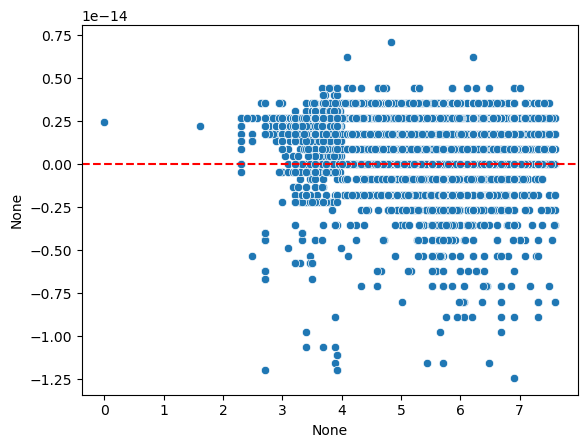

In [52]:
# 4.3. Check Homoscedasticity of the Residuals

# Q: Why Homescedasticity?
# A: To check the reliability and the validity of the regression model through variances of the residuals 
#    I can visualize the variances of the residuals, which are the errors between the predicted values and the actual values, 
#    to see if they are the same at all levels of predictor variables.

#    If the plot shows a random scatter of residuals around zero, that means the variances change across different values of the predictor variables,
#    This is the presence of heteroscedasticity

# 4.3.1. Plot the Residuals 

sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [58]:
# 4.3.2. Determine the values that check Homoscedasticity ( Statistical Test)

from statsmodels.stats.diagnostic import het_breuschpagan

# Hypothesis(H0): There is constant variance( same variance) of the residuals (Homoscedasticity): p-value > 0.05
# Hypothesis(H1): The residuals have NO constant variances (Heteroscedasticity): p-value < 0.05 
# Heteroscedasticity also means that the variances of the residuals change across different values of the predictor variables

# (If I care more about Homoscedasticity, I would try a robust model or transform the dependent variable.)

# Use Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan Test p-value: {p_value}")

Breusch-Pagan Test p-value: 0.0


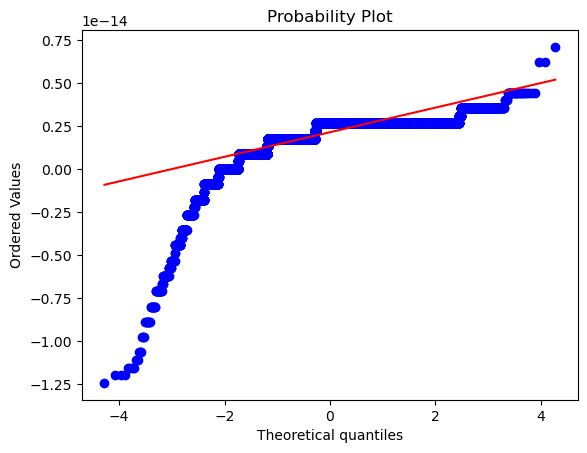

Shapiro-Wilk Test p-value: 5.791906675407041e-144


C:\Users\claud\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 74111.
  res = hypotest_fun_out(*samples, **kwds)


In [57]:
# 4.4. Check Normality of errors: Q-Q plot

# Q: Why Normality?
# A: I check Normality to see if the residual data in the linear regression are normally distributed 
##   for the sake of the reliability and the validity of hypothesis testing

# Null Hypothesis being(H0): The residual data is normally distributed
# Alternative Hypothesis being(H1): The data does not have a normal distribution

# 4.4.1. Plot the Residual Datasets to see the Distribution

stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

# Q; What measures of the Normal Distribution
# A: Shapiro function will give me a p-value and will interpret the p-value based on a threshold of 0.05
#    If the p-value is less than 0.05, the Null Hypothesis is rejected( then Normality is violated)
#    If the p-value is greater than 0.05, the Null Hypothesis is confirmed.( Residual data is normally distributed)

# 4.4.2. Check the p-value

# Shapiro-Wilk Test for normality
from scipy.stats import shapiro

stat, p_value = shapiro(model.resid)
print(f'Shapiro-Wilk Test p-value: {p_value}')

In [ ]:
# 4.4.3. Interpret the p-value & Decision- Making

# It is less than 0.05. Therefore, the residual datasets are not normally distributed
# That means there are skew or outliers heavily influencing the residuals
# The assumption of "Normality" is violated in this model.

# If Normality was highly recommended, I would try alternative models such as "Robust Regression" or "Bootstrapping"
# These models do NOT assume Normality. So, I will get reliable Statistical Inference for a model that will fit WELL the data. 

In [55]:
# 4.5. Check Multicollinearity: VIF

# Why Multicollinearity?

# A: I want to check because predictor variables should not be highly correlated with each other. 
# If the Coefficients are greater than 5 or 10, then, there is Multicollinearity.
# If not, there is no Multicollinearity

vif = pd.DataFrame()
vif['Variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

               Variable         VIF
0                 const  224.779149
1          accommodates    3.702076
2             bathrooms    1.599602
3  review_scores_rating    1.011478
4              bedrooms    2.562781
5                  beds    3.329497
6             log_price    1.527835


In [36]:
### Step 5: Data Modeling

# Use a multiple regression to predict the log_price as a Target variable
# Predictor Variables are the following: accommodates, bathrooms, review_scores_rating, bedrooms, beds

# 5.1. Build the Multiple Linear Regression Model on Training Datasets

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [43]:
# 5.2. Print the Multiple Linear Regression Equation

print("Intercept (β₀):", model.intercept_)
print("Coefficients (βs):", model.coef_)

# Matching the Predictor Variables to the Coefficients

for feature, coef in zip(x_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Intercept (β₀): 3.552713678800501e-15
Coefficients (βs): [ 6.27915739e-16  7.48325033e-16  3.58996465e-17  1.34555362e-16
 -1.92609094e-17  1.00000000e+00]
accommodates: 0.00
bathrooms: 0.00
review_scores_rating: 0.00
bedrooms: 0.00
beds: -0.00
log_price: 1.00


In [37]:
# 5.2. Predict using the Multiple Linear Regression model on Test Datasets

AirBNB_model_pred = model.predict(x_test)
print(AirBNB_model_pred)

[3.80666249 4.94164242 4.94164242 ... 4.59511985 5.29831737 5.52146092]


In [46]:
### Step 6: Evaluation of the Model Performance

# 6.1. Compute the Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, AirBNB_model_pred)
mse = mean_squared_error(y_test, AirBNB_model_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, AirBNB_model_pred)



In [47]:
# 6.2. Display the results of the Performance Metrics

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 0.000
Root Mean Squared Error (RMSE): 0.000
R^2 Score: 1.000


In [ ]:
# 6.3. Interpretation of the Results

# MAE stands for Mean Absolute Error, which is the Average difference between the actual values ( y_test) and predicted values (AirBNB_model_predict) 
# Here MAE is equal to 0 which means there is no difference
# RMSE stands for Root Mean Squared Error, check if there is a squared error. Here, there is no squared error, the predictions are therefore spot-on.
# R^2 Score stands for R- Squared the model shows 100% of the variance in the target variable.